# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Location
from shapely.geometry import Point
from geopandas import GeoDataFrame
import geopandas as gpd

from my_pickle import unpickle_it


# Read in data

In [2]:
user_df = unpickle_it('user_df')
convo_df = unpickle_it('convo_df')

print("Make sure we're not useing ECT data")
print(pd.to_datetime(convo_df.timestamp.max()*1000000))

Make sure we're not useing ECT data
2017-10-02 01:35:58.644000


In [3]:
user_df.head(2)

,created,updated,about,has_about,len_about,available,birthday,age,collegeId,emailVerified,...,roomTypeId,smokingOk,term,work,messages_sent,responses_received,attractiveness,messages_received,responses_sent,selectivity
uid,,,,,,,,,,,,,,,,,,,,,
0a9yOPKFSH,2017-06-19 03:31:08,2018-01-04 21:24:41,,False,0,nan,1992-01-01,26.0,NaN,1,...,2.0,0.0,12.0,SEG,7.0,2.0,0.285714,9.0,2.0,0.777778
0owxBbcyZ6,2017-10-12 00:32:29,2018-01-04 03:05:50,,False,0,nan,1974-01-01,44.0,NaN,1,...,NaN,1.0,NaN,WA State,0.0,0.0,0.000000,7.0,0.0,0.000000


In [4]:
convo_df.head(2)

,conv_id,response,first_uid,second_uid,first_mid,second_mid,timestamp
16296,rKdn0zblFiRVDUEmDHyQ,True,rKdn0zblFi,RVDUEmDHyQ,-KWKghvlpF67UOv-iXXO,-KWKg_ybWV4qbG02NYrb,1478906535730
9241,aXnWmLjpaERVDUEmDHyQ,False,aXnWmLjpaE,RVDUEmDHyQ,-KWLsSEmEJgH3bhJupE7,None,1478926390334


# COST RANGE

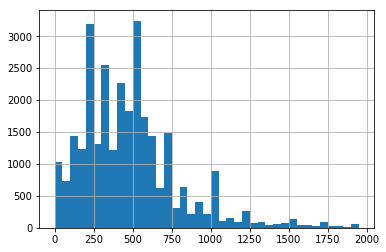

In [26]:
user_df['cost_range'] = user_df.maxCost-user_df.minCost
user_df.cost_range.hist(bins=range(0,2000,50))
plt.show()

# NUM ROOMMATES

<Container object of 25 artists>

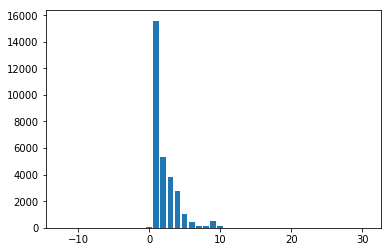

In [27]:
x = user_df.groupby('numRoommates').created.count().index
y = user_df.groupby('numRoommates').created.count().values
plt.bar(x, y)

# CONVERSATIONS

### basic info

In [ ]:
print("There are {} conversation.".format(len(convo_df)))

In [ ]:
response_rate = convo_df.response.sum()/len(convo_df)
print("Messages get responses {:.2} of the time.".format(response_rate))

In [ ]:
# plt.scatter(user_response.sent,user_response.responses)

# plt.xlabel('sent')
# plt.ylabel('responses')
# plt.show()

In [ ]:
# df = message_df[['date']]
# df.groupby([df["date"].dt.year, df["date"].dt.month, df["date"].dt.day]).count().plot()

## Find outliers

In [ ]:
# user_response[user_response.sent>150]

# USERS

### CREATED

In [ ]:
user_df.created.hist(figsize=(16,2));

### UPDATED

In [ ]:
# time with the app 

# Date Updated - Last Active

# (rough idea of how long users interact with the site (over days or months?)

user_df['time_with_site'] = user_df.lastActive-user_df.created
user_df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,400));

# a lot of one day interactions (cut out for sake of visibility)
# strange peaks and drop off.updated.hist(figsize=(16,2));

### time until most recent edit 

Date Updated - Date Created

(rough idea of how long users interact with the site (over days or months?)

In [ ]:
user_df['time_with_site'] = user_df.updated-user_df.created
user_df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,400));

# a lot of one day interactions (cut out for sake of visibility)
# strange peaks and drop off

### ABOUT

#### length

In [ ]:
user_df.len_about.hist(bins=range(1, 1000, 10), figsize = [10, 3])
plt.title("Lenght of 'about' Section")
plt.tight_layout()

#### percent responding

In [ ]:
wth = user_df[user_df.len_about > 0].count()['about']
wthout = user_df[user_df.len_about == 0].count()['about']
print('total number of user entries: {}'.format(wth+wthout))
print('number with about sections: {}'.format(wth))
print('number without about sections: {}'.format(wthout))
print('percent with about sections: {}'.format(wth/(wth+wthout)))

### AVAILABLE

In [ ]:
# user_df.available.dropna.hist(figsize=(16,2));
# would be nice to drop NaN more reasonably

### BIRTHDAY

In [ ]:
user_df = user_df.fillna({'birthday' : pd.to_datetime('1899-01-01')})


user_df['birth_year'] = user_df['birthday'].apply(lambda x: x.year)
user_df['birth_month'] = user_df['birthday'].apply(lambda x: x.month)

fig, ax = plt.subplots(1, ncols=2, figsize=(14, 3))

ax[0].hist(user_df.birth_year, bins=range(1950, 2000))
ax[0].set_title("Birth Years")

ax[1].hist(user_df.birth_month, bins=range(1, 13))
ax[1].set_title("Birth Month")

plt.tight_layout()

In [ ]:
user_df['age'] = 2018-user_df['birthday'].apply(lambda x: x.year)
user_df['has_bday'] = user_df['birthday'].apply(lambda x: x.month) != 1
user_df.head(2)

In [ ]:
# age on Jan 1 2018
today = pd.to_datetime('2018-01-01')
user_df['age'] = (today-user_df['birthday'])/365

user_df.age.apply(lambda x: x.days).hist(bins=range(18,100), figsize=(16,2));

### FOUND ROOMMATE

In [ ]:
found = user_df.foundRoommate.sum()
print("{} users found a roommate, which is {:.3} of the total.".format(found, found/len(user_df)))

In [ ]:
user_df.head(1)

In [ ]:
# Goal: of ppl with about, what % found a roommate
users_with_about_df = user_df[user_df.len_about >0]
users_without_about_df = user_df[user_df.len_about == 0]

print("percent with about finding roommates: {}".format(users_with_about_df.foundRoommate.sum()/len(users_with_about_df)))
print("percent without about finding roommates: {}".format(users_without_about_df.foundRoommate.sum()/len(users_without_about_df)))


### LOCATION

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [ ]:
geometry = [Point(xy) for xy in zip(user_df.longitude, user_df.latitude)]
loc_df = user_df[['longitude', 'latitude']]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(loc_df, crs=crs, geometry=geometry)

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-126, -67])
ax.set_ylim([24, 50])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

### time with the app 

Date Updated - Last Active

(rough idea of how long users interact with the site (over days or months?)

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-123, -121])
ax.set_ylim([36, 39])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
fig, ax = plt.subplots(figsize = (16,10))

ax.set_aspect('equal')
ax.set_xlim([-122.6, -122.3])
ax.set_ylim([37.6, 37.9])

world.plot(ax=ax, color='#66FF66', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='#FF00FF', markersize=5)
ax.set_facecolor("#00FFFF")
plt.show();

''' OPTION TWO
base = world.plot(color='white', edgecolor='black', figsize = (16,10))
gdf.plot(ax=base, marker='o', color='#FF00FF', markersize=5);
''';

In [ ]:
user_df['time_with_site'] = user_df.lastActive-user_df.created
user_df.time_with_site.apply(lambda x: x.days).hist(bins=range(1,300), figsize=(16,2));

# COMBINE USERS AND MESSAGES

In [ ]:
plt.scatter(user_df.len_about, user_df.attractiveness)
plt.axis([0,1000,0,1])

In [ ]:
user_df['cost_range'] = user_df.maxCost-user_df.minCost
user_df.cost_range.hist(bins=range(0,2000,50))
plt.show()
user_df.head(2)